In [1]:
import numpy as np
import scipy.stats as stats
import scipy.special as special
from matplotlib import pyplot as plt

## Wald's test

Data:
$$
x_1,\ldots,x_n \sim f(x\mid\beta)
$$

Likelihood function:
$$
L_n(\beta) = \prod_i f(x_i\mid\beta)
$$

Log-likelihood function:
$$
\ell_n(\beta) = \log L(\beta) = \sum_i\log f(x_i\mid\beta)
$$

Maximum likelihood estimator (MLE) of $\beta$:
$$
\hat{\beta}_n = \operatorname{argmin} L_n(\beta) = \operatorname{argmin} \ell_n(\beta)
$$

Aymptotic variance of the MLE:
$$
\sigma^2(\hat{\beta}_n) = -\frac1{\mathbb{E}[\ell_n''(\hat\beta_n)]}
$$

Asymptotic normality of the MLE:
$$
z_n = \frac{\hat\beta_n - \beta}{\sigma(\hat\beta_n)} \longrightarrow N(0, 1)\qquad\text{as $n\to\infty$}
$$

> $w_n = z_n^2$ is called the *Wald statistic*.

Hypothsis test:
$$
\begin{aligned}
H_0&: \beta = \beta_0,\\
H_1&: \beta \neq \beta_0
\end{aligned}
$$

$p$-value: Probability, under the null hypothesis, of a standard normal random variable giving a result more extreme than the one observed.
$$
p = P_{Z\sim N(0,1)}(|Z| \geq |z_n|)
$$

If $p\leq \alpha$, we reject the null hypothesis at significance level $\alpha$.

### Problem

A sequence 50 of coin tosses yields 31 heads and 19 tails.

Test the hypothesis "the coin is fair" with significance level $\alpha=0.05$.

### Solution

Let $x_i\in\{0,1\}$ be the result of the $i$-th coin toss, encoding heads as $1$ and tails as $0$. 

Assume $x_i\sim \operatorname{Bernoulli(p)}$.

We're testing the null hypothesis $p = 0.5$.

The MLE of $p$ given the data $x_i$, $i<50$, is:
$$
\hat{p} = \frac1{50}\sum_ix_i = \frac{31}{50} = 0.68
$$

We have:
$$
\sigma(\hat{p}) = \sqrt{\frac{\hat{p}(1-\hat{p})}{50}}
$$

In [60]:
p = 0.5
phat = 0.38
sigmaphat = np.sqrt(phat*(1-phat)/50)
z = (phat - p)/sigmaphat
z

-1.748149640244195

$$
\text{$p$-value} = P(|Z|>|z|) = P(Z < -|z|) + P(Z > |z|)
$$

In [62]:
pvalue = stats.norm.cdf(-np.abs(z)) + (1 - stats.norm.cdf(np.abs(z)))
print(f"p-value = {pvalue:.2f}")

p-value = 0.08 > 0.05


Since the $p$-value is $0.08$ we cannot reject the null hypothesis at significance level $\alpha=0.05$.

### Problem

The following data $x_i$, $i<20$, are a random sample drawn from a Poisson distribution with unknown parameter $\mu$:
$$
8,  8,  5,  7,  7,  7,  5,  4,  5,  8,  3,  9,  5,  7,  5,  6,  5, 6,  4, 10
$$

Test the null hypothesis $\mu=5$.

### Solution

We're testing the null hypothesis $\mu = 5$.

The MLE of $\mu$ given the data $x_i$, $i<20$, is:
$$
\hat{\mu} = \frac1{20}\sum_ix_i = \frac{124}{20} = 6.2
$$

We have:
$$
\sigma(\hat{\mu}) = \sqrt{\frac{\hat\mu}{20}} = 0.31
$$

In [89]:
n = 20
mu = 5
x = np.array([8,  8,  5,  7,  7,  7,  5,  4,  5,  8,  3,  9,  5,  7,  5,  6,  5, 6,  4, 10])
muhat = x.mean()
sigmamuhat = np.sqrt(muhat/n)
z = (muhat - mu)/sigmamuhat
print(f"z = {z:.2f}")

z = 2.16


$$
\text{$p$-value} = P(|Z|>|z|) = P(Z < -|z|) + P(Z > |z|)
$$

In [88]:
pvalue = stats.norm.cdf(-np.abs(z)) + (1 - stats.norm.cdf(np.abs(z)))
print(f"p-value = {pvalue:.2f}")

p-value = 0.03


Since the $p$-value is $0.03$ we reject the null hypothesis at significance level $\alpha=0.05$.

## The score test

Let $\hat{\beta_n}$ be the MLE of $\beta$ associated to a dataset of size $n$:
$$
\hat\beta_n = \argmax\ell_n(\beta)
$$

Let
$$
u_n(\beta) = \mathbb{E}[\ell_n'(\beta)],\qquad v_n(\beta) = -\mathbb{E}[\ell_n''(\beta)].
$$

The *score statistic*:
$$
S_n = \frac{u_n(\hat{\beta}_n)}{\sqrt{v_n(\hat{\beta}_n)}}
$$

Asymptotic normality:
$$
S_n\longrightarrow N(0,1)\qquad \text{as $n\to\infty$}
$$

$S$ is used to test the hypothesis $\beta=\beta_0$ just like the $Z$ is.

### Illustration

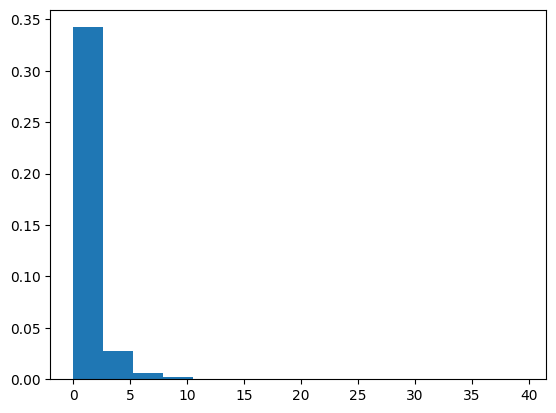

In [112]:
rng = np.random.default_rng(42)
n = 20
mu0 = 4
n_iter = 1000000
scores = np.zeros(n_iter)
for i in range(n_iter):
    x = stats.poisson.rvs(mu0, size=n, random_state=rng)
    u = n*(x.mean()/mu0 - 1)
    v = n/x.mean()
    scores[i] = u**2/v

plt.hist(scores, bins=15, density=True);
# x = np.linspace(0, 13, 100)
# plt.plot(x, stats.chi2(df=1).pdf(x), lw=3)
# plt.xlim(0, 7)
# plt.title("Distribution of $S_{20}$ for Poisson $x_i$ with $\mu=4$")

$$
f(\mu\mid x) = e^{-\mu}\frac{\mu^x}{x!}
$$

$$
\ell_n(\mu) = \sum_{i < n}(-\mu + x\log\mu - \log x!) = n(-\mu + \bar{x}\log\mu - \log x!)
$$

$$
\ell_n'(\mu) = n\left(\frac{\bar{x}}\mu - 1\right)
$$

$$
\ell_n'(\mu_0) = n\left(\frac{\bar{x}}{\mu_0} - 1\right)
$$

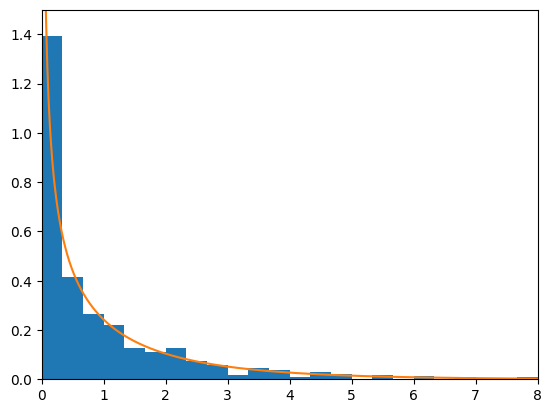

In [126]:
plt.hist(scores, bins=np.linspace(0, 8, 25), density=True);
plt.xlim(0, 8)
plt.ylim(0, 1.5)

t = np.arange(0.01, 10, 0.01)
plt.plot(t, stats.chi2(df=1).pdf(t))

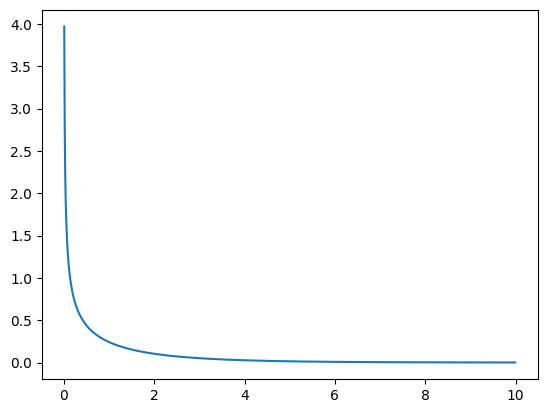

In [117]:
t = np.arange(0.01, 10, 0.01)
plt.plot(t, stats.chi2(df=1).pdf(t))

In [116]:
t

array([], dtype=float64)